In [3]:
# importing the keras librareis and packages

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import SGD

In [ ]:
import splitfolders
splitfolders.ratio("featured", output="dataset", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 792 files [00:02, 353.54 files/s]


In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/identity/dataset/train',
    target_size=(256, 256),
    batch_size=30,
    class_mode='binary')

val_set = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/identity/dataset/val',
    target_size=(256, 256),
    batch_size=5,
    class_mode='binary')

Found 630 images belonging to 10 classes.
Found 75 images belonging to 10 classes.


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

inputs = keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)

In [16]:
for layer in base_model.layers:
    layer.trainable=False

optimizer = SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="categorical_crossentropy",
                optimizer=optimizer, metrics=["accuracy"])
training = model.fit(training_set, validation_data=val_set, epochs=3)
model.save('model')

Epoch 1/3
21/21 [==============================] - 176s 8s/step - loss: 5.0352e-07 - accuracy: 0.1175 - val_loss: 5.0545e-07 - val_accuracy: 0.1067
Epoch 2/3
21/21 [==============================] - 171s 8s/step - loss: 5.0352e-07 - accuracy: 0.1206 - val_loss: 5.0545e-07 - val_accuracy: 0.1067
Epoch 3/3
21/21 [==============================] - 171s 8s/step - loss: 5.0352e-07 - accuracy: 0.1238 - val_loss: 5.0545e-07 - val_accuracy: 0.1067
INFO:tensorflow:Assets written to: model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


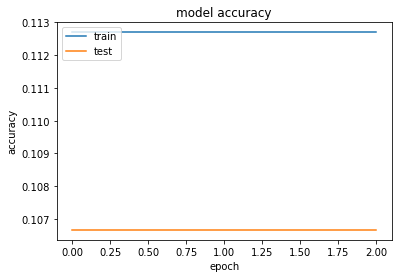

In [7]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()